In [5]:
import cv2
import numpy as np
from dataclasses import dataclass
import inpainting

In [6]:
@dataclass
class Parameters:
    hi: float
    hj: float

In [ ]:
# Folder with the images
image_folder = 'images/'
image_name = 'image1'
# There are several black and white images to test inside the images folder:
#  image1_to_restore.jpg
#  image2_to_restore.jpg
#  image3_to_restore.jpg
#  image4_to_restore.jpg
#  image5_to_restore.jpg

# Read an image to be restored
full_image_path = image_folder + image_name + '_to_restore.jpg'
im = cv2.imread(full_image_path, cv2.IMREAD_UNCHANGED)

# Print image dimensions
print('Image Dimensions : ', im.shape)
print('Image Height     : ', im.shape[0])
print('Image Width      : ', im.shape[1])

In [ ]:
# Show image
cv2.imshow('Original image', im)
cv2.waitKey(0)

In [ ]:
# Normalize values into [0,1]
min_val = np.min(im)
max_val = np.max(im)
im = (im.astype('float') - min_val)
im = im / max_val

In [ ]:
# Show normalized image
cv2.imshow('Normalized image', im)
cv2.waitKey(0)

In [ ]:
# Load the mask image
full_mask_path = image_folder + image_name + '_mask.jpg'
mask_img = cv2.imread(full_mask_path, cv2.IMREAD_UNCHANGED)
# From the mask image we define a binary mask that "erases" the darker pixels from the original image
mask = (mask_img > 128).astype('float')
# mask[i,j] == 1 means we have lost information in that pixel
# mask[i,j] == 0 means we have information in that pixel
# We want to in-paint those areas in which mask == 1

# Mask dimensions
dims = mask.shape
ni = mask.shape[0]
nj = mask.shape[1]
print('Mask Dimension : ', dims)
print('Mask Height    : ', ni)
print('Mask Width     : ', nj)

In [ ]:
# Show the mask image and binarized mask
cv2.imshow('Mask image', mask_img)
cv2.waitKey(0)
cv2.imshow('Binarized mask', mask)
cv2.waitKey(0)

In [ ]:
# Parameters
param = Parameters(0, 0)
param.hi = 1 / (ni-1)
param.hj = 1 / (nj-1)

In [ ]:
# Perform the in-painting
u = inpainting.laplace_equation(im, mask, param)

In [ ]:
# Show the final image
cv2.imshow('In-painted image', u)
cv2.waitKey(0)

In [ ]:
### Let us now try with a colored image (image6) ###

del im, u, mask_img
image_name = 'image6'
full_image_path = image_folder + image_name + '_to_restore.tif'
im = cv2.imread(full_image_path, cv2.IMREAD_UNCHANGED)

In [ ]:
# Normalize values into [0,1]
min_val = np.min(im)
max_val = np.max(im)
im = (im.astype('float') - min_val)
im = im / max_val

In [ ]:
# Show normalized image
cv2.imshow('Normalized Image', im)
cv2.waitKey(0)

In [ ]:
# Number of pixels for each dimension, and number of channels
# height, width, number of channels in image
ni = im.shape[0]
nj = im.shape[1]
nc = im.shape[2]

# Load and show the (binarized) mask
full_mask_path = image_folder + image_name + '_mask.tif'
mask_img = cv2.imread(full_mask_path, cv2.IMREAD_UNCHANGED)
mask = (mask_img > 128).astype('float')

In [ ]:
cv2.imshow('Binarized mask', mask)
cv2.waitKey(0)

In [ ]:
# Parameters
param = Parameters(0, 0)
param.hi = 1 / (ni-1)
param.hj = 1 / (nj-1)

In [ ]:
# Perform the in-painting for each channel separately
u = np.zeros(im.shape, dtype=float)
u[:, :, 0] = inpainting.laplace_equation(im[:, :, 0], mask[:, :, 0], param)
u[:, :, 1] = inpainting.laplace_equation(im[:, :, 1], mask[:, :, 1], param)
u[:, :, 2] = inpainting.laplace_equation(im[:, :, 2], mask[:, :, 2], param)

In [ ]:
# Show the final image
cv2.imshow('In-painted image', u)
cv2.waitKey(0)

In [7]:
### Let us now try with a colored image (image7) without a mask image ###

# Write your code to remove the red text overlayed on top of image7_to_restore.png
# Hint: the undesired overlay is plain red, so it should be easy to extract the (binarized) mask from the image file

#del im, u, mask_img
image_name = 'image7'
full_image_path = image_folder + image_name + '_to_restore.png'
im = cv2.imread(full_image_path, cv2.IMREAD_UNCHANGED)

# Normalize values into [0,1]
min_val = np.min(im)
max_val = np.max(im)
im = (im.astype('float') - min_val)
im = im / max_val

In [8]:
# Show normalized image
cv2.imshow('Normalized Image', im)
cv2.waitKey(0)

-1

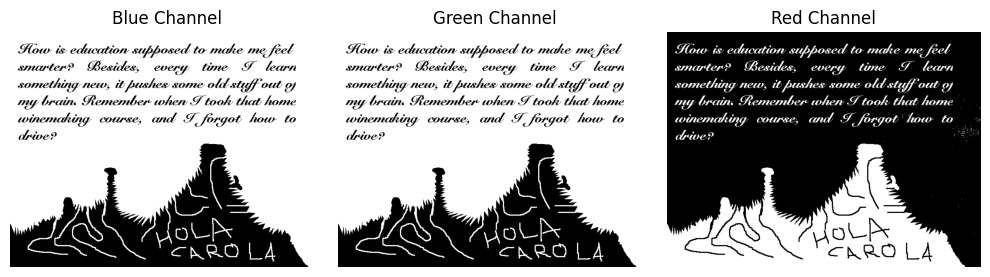

In [9]:
import matplotlib.pyplot as plt

def plot_bgra_channels(image, thresholds=(None, None, None)):

    # Check if the image has 4 channels (BGRA)
    if image.shape[2] != 4:
        raise ValueError("Input image must be a BGRA image")

    # Split the channels
    B, G, R, A = cv2.split(image)

    # Apply thresholds if provided (binarization)
    B_thresh = (B > thresholds[0]).astype(np.uint8) * 255 if thresholds[0] is not None else B
    G_thresh = (G > thresholds[1]).astype(np.uint8) * 255 if thresholds[1] is not None else G
    R_thresh = (R > thresholds[2]).astype(np.uint8) * 255 if thresholds[2] is not None else R

    # Create a subplot for the channels
    plt.figure(figsize=(10, 5))
    
    # Plot Blue channel
    plt.subplot(1, 3, 1)
    plt.title('Blue Channel')
    plt.imshow(B_thresh, cmap='gray')
    plt.axis('off')

    # Plot Green channel
    plt.subplot(1, 3, 2)
    plt.title('Green Channel')
    plt.imshow(G_thresh, cmap='gray')
    plt.axis('off')

    # Plot Red channel
    plt.subplot(1, 3, 3)
    plt.title('Red Channel')
    plt.imshow(R_thresh, cmap='gray')
    plt.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_bgra_channels(im, thresholds=(0.001, 0.001, 0.999))

In [26]:
# Number of pixels for each dimension, and number of channels
# height, width, number of channels in image
ni = im.shape[0]
nj = im.shape[1]
nc = im.shape[2]

# Load and show the (binarized) mask
B, G, R, A = cv2.split(im)  # BGRA
# B < 0.001 or G < 0.001 (they are equal) are better than R > 0.999 as some parts of the image have high red value
mask = (B < 0.001).astype('float')

In [27]:
cv2.imshow('Binarized mask', mask * 255)
cv2.waitKey(0)

-1

In [28]:
# Parameters
param = Parameters(0, 0)
param.hi = 1 / (ni-1)
param.hj = 1 / (nj-1)

# Perform the in-painting for each channel separately
u = np.zeros(im.shape, dtype=float)
u[:, :, 0] = inpainting.laplace_equation(im[:, :, 0], mask, param)
u[:, :, 1] = inpainting.laplace_equation(im[:, :, 1], mask, param)
u[:, :, 2] = inpainting.laplace_equation(im[:, :, 2], mask, param)

In [29]:
# Show the final image
cv2.imshow('In-painted image', u)
cv2.waitKey(0)

-1